# Simple Linear Regressor

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

X = [0, 6, 11, 14, 22]
Y = [1, 7, 12, 15, 21]

def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    
    n = len(X)
    
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - (n * xbar * ybar)
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    
    b = numer / denum
    a = ybar - b * xbar
    
    print(f"best fit line:\ny = {a:.2f} + {b:.2f}x")
    
    return a, b

In [3]:
a, b = best_fit(X, Y)

best fit line:
y = 1.48 + 0.92x


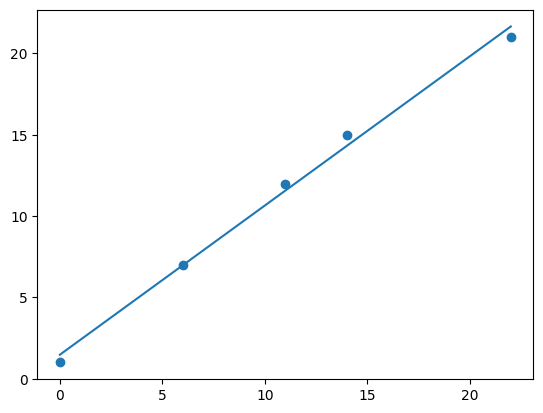

In [4]:
# Plot points
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.show()

Coefficients: 
 [887.13612938]
Mean squared error: 3916.90
Variance score: 0.34


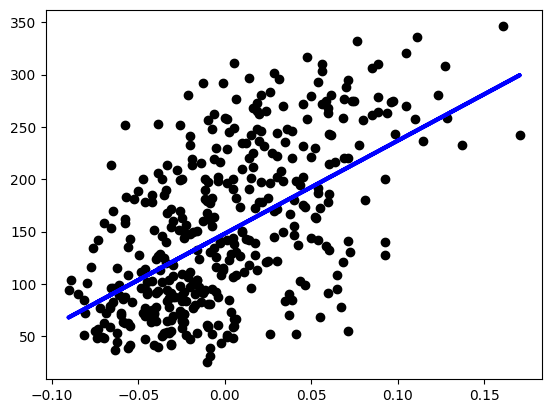

In [15]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split data into training/testing sets
diabetes_X_train = diabetes_X[:-400]
diabetes_X_test = diabetes_X[-400:]

diabetes_y_train = diabetes.target[:-400]
diabetes_y_test = diabetes.target[-400:]
# Create linear regression object
model = linear_model.LinearRegression()
# Train the model using the training set
model.fit(diabetes_X_train, diabetes_y_train)
# Make prediction
diabetes_y_pred = model.predict(diabetes_X_test)

print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# If variance is 1 prediction is perfect
print("Variance score: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()